# Проект: классификация

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [138]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [139]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.isna().sum().sort_values(ascending=False)

balance      25
age           0
day           0
poutcome      0
previous      0
pdays         0
campaign      0
duration      0
month         0
contact       0
job           0
loan          0
housing       0
default       0
education     0
marital       0
deposit       0
dtype: int64

### Задание 2

In [140]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [141]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace("$", "").replace(",", ".").replace(" ", "")
        return float(value)
    else:
        return value

df['balance'] = df['balance'].apply(convert_to_float)
df['balance'].mean().round(3)

1529.129

### Задание 4

In [142]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'].median()
df['balance'] = df['balance'].fillna(df['balance'].median())
df['balance'].mean().round(3)

1526.936

### Задание 5

In [143]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df[['job', 'education']] = df[['job', 'education']].replace('unknown', pd.np.nan)
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['job'] = df['job'].fillna(df['job'].mode()[0])

In [144]:
education_pop = df['education'].value_counts().index[0]
job_pop = df['job'].value_counts().index[0]
job_pop
df[(df['education'] == education_pop) & (df['job'] == job_pop)]['balance'].mean().round(4)

1598.883

### Задание 6

In [145]:
# удалите все выбросы для признака balance

# вычисляем квартили и межквартильный размах
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# определяем границы выбросов
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

## Часть 2:  Разведывательный анализ

### Задание 1

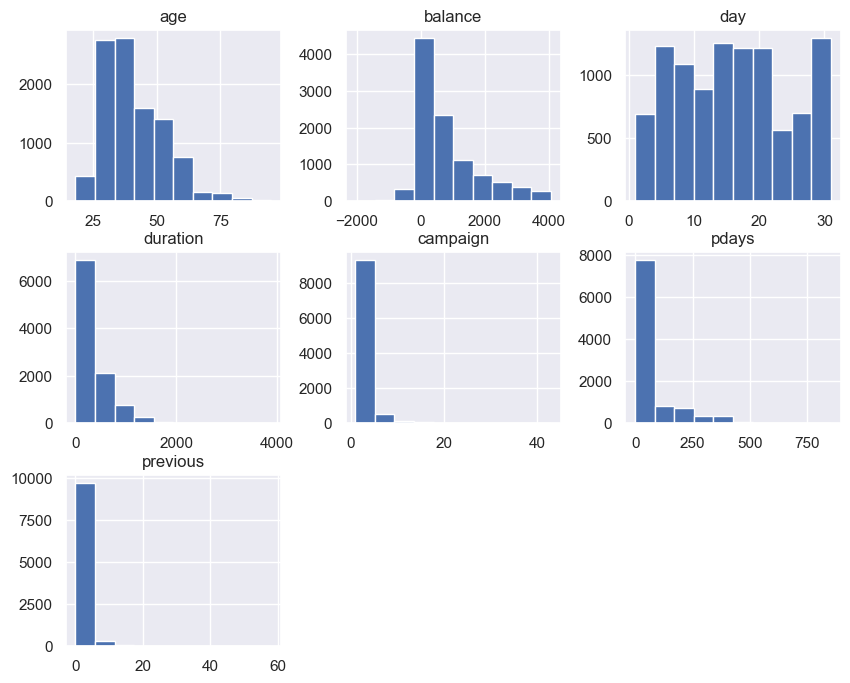

In [146]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
df.hist(figsize=(10, 8), layout=(3, 3)) ;

In [147]:
# Для знакомства с данными воспользуюсь библиотекой ProfileReport
# from ydata_profiling import ProfileReport

In [148]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

### Задания 2 и 3

In [149]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат

# есть в profile

### Задания 4 и 5

In [150]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

# есть в profile

### Задание 6

<AxesSubplot:xlabel='poutcome'>

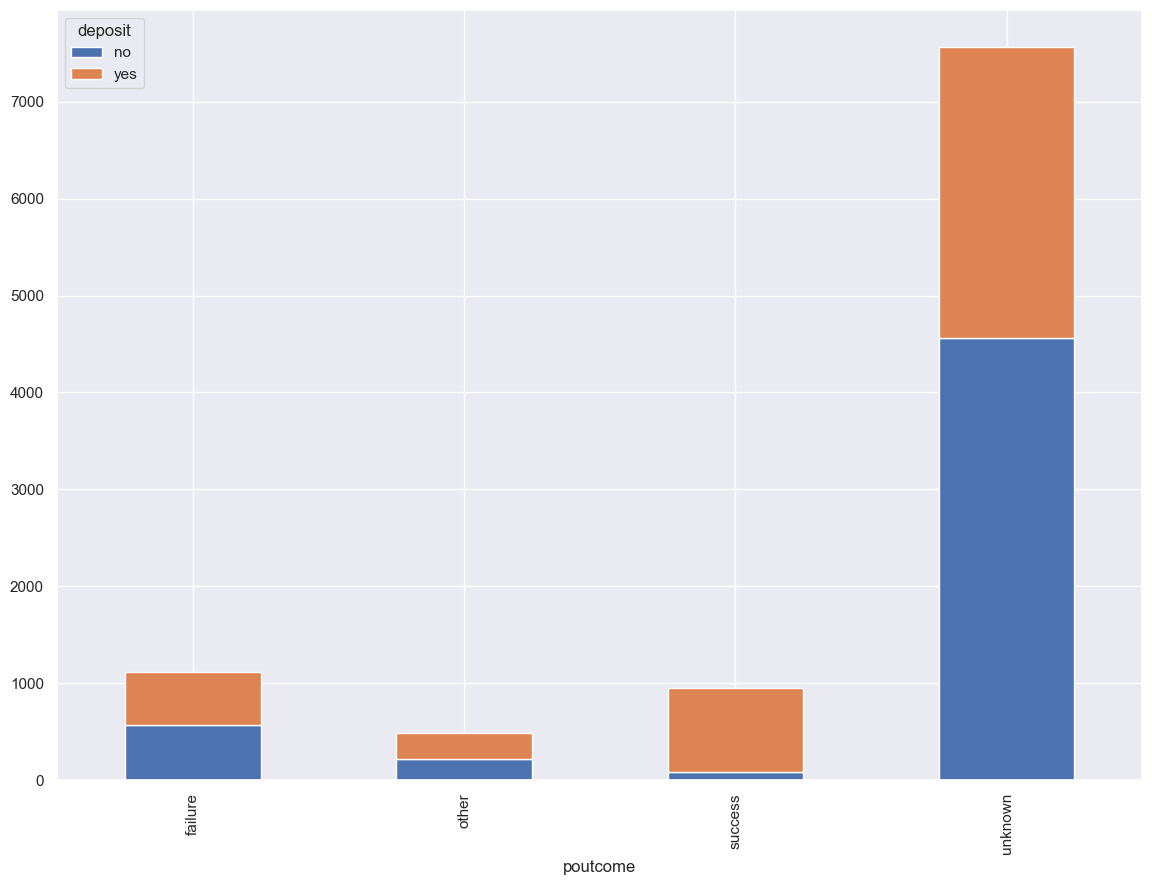

In [151]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# Используем группировку 'deposit' по индексу 'poutcome'

types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [152]:
types

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


### Задание 7

<AxesSubplot:xlabel='month'>

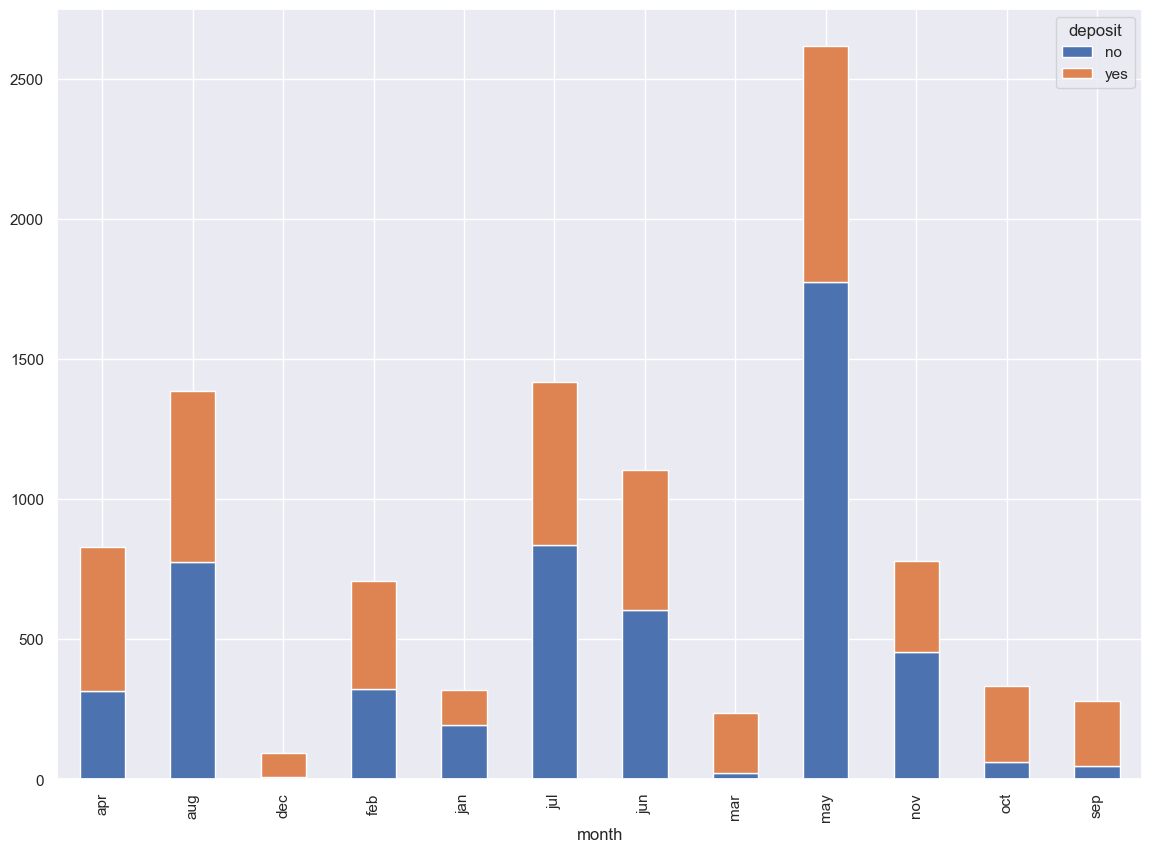

In [153]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
types = df.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

### Задание 8

<AxesSubplot:xlabel='age_group', ylabel='count'>

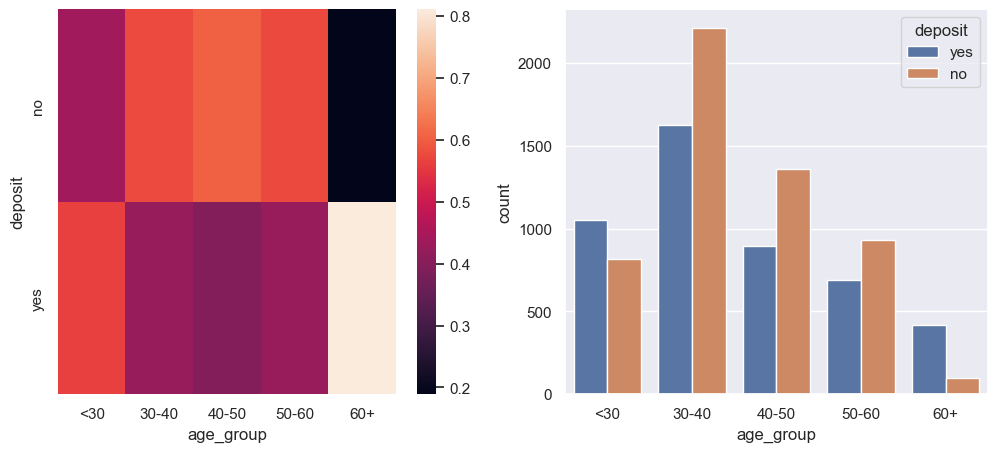

In [154]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# Для создания категорий используем метод cut()

df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
df_group_age = df.groupby("age_group")['deposit'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(df_group_age.T, ax=axes[0])
sns.countplot(x="age_group", hue="deposit", data=df, ax=axes[1])

### Задания 9 и 10

<AxesSubplot:xlabel='marital', ylabel='count'>

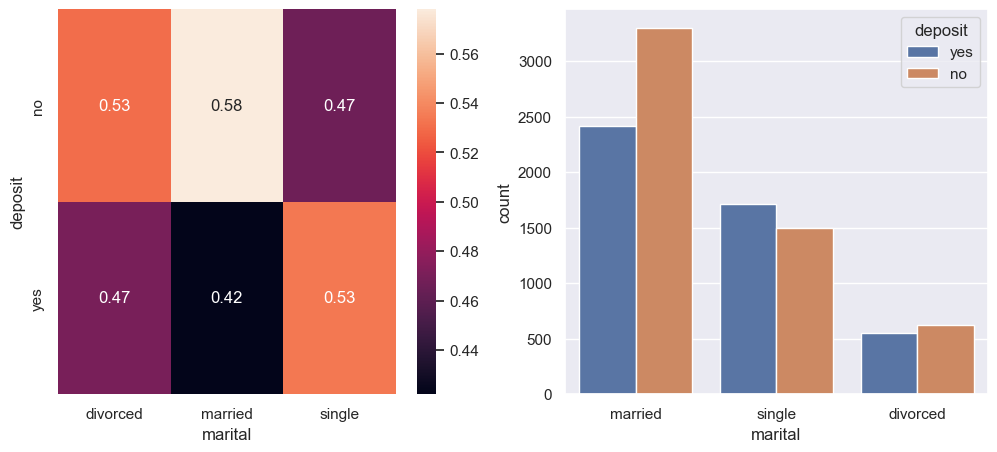

In [155]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
df_group_marital  = df.groupby("marital")['deposit'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(df_group_marital.T, ax=axes[0], annot=True)
sns.countplot(x="marital", hue="deposit", data=df, ax=axes[1])

<AxesSubplot:xlabel='education', ylabel='count'>

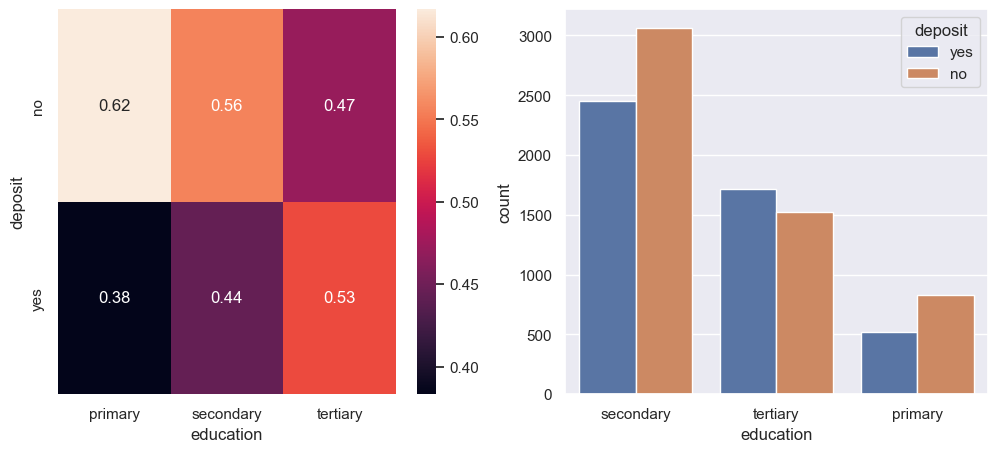

In [156]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
df_group_education  = df.groupby("education")['deposit'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(df_group_education.T, ax=axes[0], annot=True)
sns.countplot(x="education", hue="deposit", data=df, ax=axes[1])

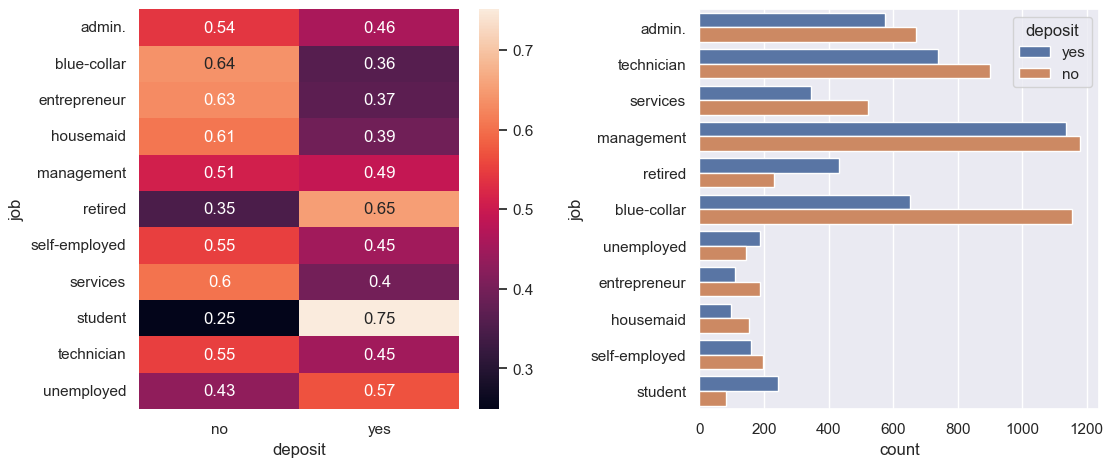

In [157]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

df_group_job  = df.groupby("job")['deposit'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.heatmap(df_group_job, ax=axes[0], annot=True)
sns.countplot(y="job", hue="deposit", data=df, ax=axes[1])

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4) 

In [158]:
df['job'].value_counts()

management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

### Задание 11

<AxesSubplot:xlabel='education', ylabel='marital'>

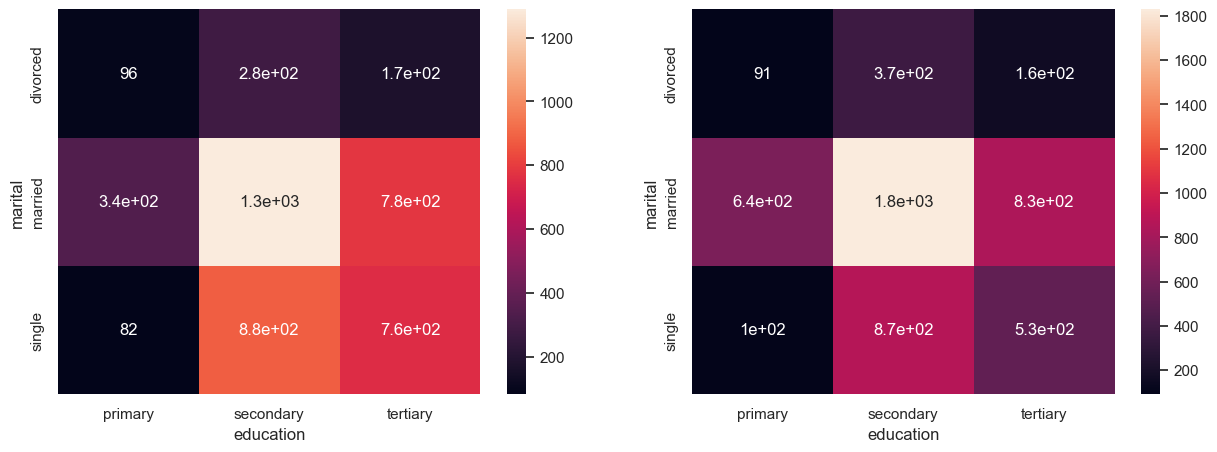

In [159]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

df_deposit_yes = df[df['deposit'] == 'yes']
df_deposit_no = df[df['deposit'] == 'no']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.heatmap(pd.crosstab(df_deposit_yes['marital'], df_deposit_yes['education']), annot=True, ax=axes[0])
sns.heatmap(pd.crosstab(df_deposit_no['marital'], df_deposit_no['education']), annot=True, ax=axes[1])

## Часть 3: преобразование данных

### Задание 1

In [160]:
# преобразуйте уровни образования

# Создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()

# Кодирование признака 'education'
df['education'] = lab_enc.fit_transform(df['education'])
df['education'].sum()

11995

In [161]:
# Кодирование признака 'age_group'
df['age_group'] = lab_enc.fit_transform(df['age_group'])
df['age_group'].value_counts()

0    3842
1    2255
4    1870
2    1625
3     513
Name: age_group, dtype: int64

### Задания 2 и 3

In [162]:
# преобразуйте бинарные переменные в представление из нулей и единиц
columns_binary = df.nunique()[df.nunique()==2].index.to_list()
df[columns_binary] = df[columns_binary].replace({'yes': 1, 'no': 0})
round(df['deposit'].std(), 3)

0.499

In [163]:
df[['default', 'housing', 'loan']].mean().sum().round(3)

0.635

In [164]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,0,0,1.0,1,0,cellular,20,apr,257,1,-1,0,unknown,0,0
11158,39,services,married,1,0,733.0,0,0,unknown,16,jun,83,4,-1,0,unknown,0,0
11159,32,technician,single,1,0,29.0,0,0,cellular,19,aug,156,2,-1,0,unknown,0,0
11160,43,technician,married,1,0,0.0,0,1,cellular,8,may,9,2,172,5,failure,0,1


### Задание 4

In [165]:
# создайте дамми-переменные
df_dummies = pd.get_dummies(df[['job', 'marital', 'contact', 'month', 'poutcome']])
df_full = pd.concat([df, df_dummies], axis=1)
df_full.shape

(10105, 51)

### Задания 5 и 6

<AxesSubplot:>

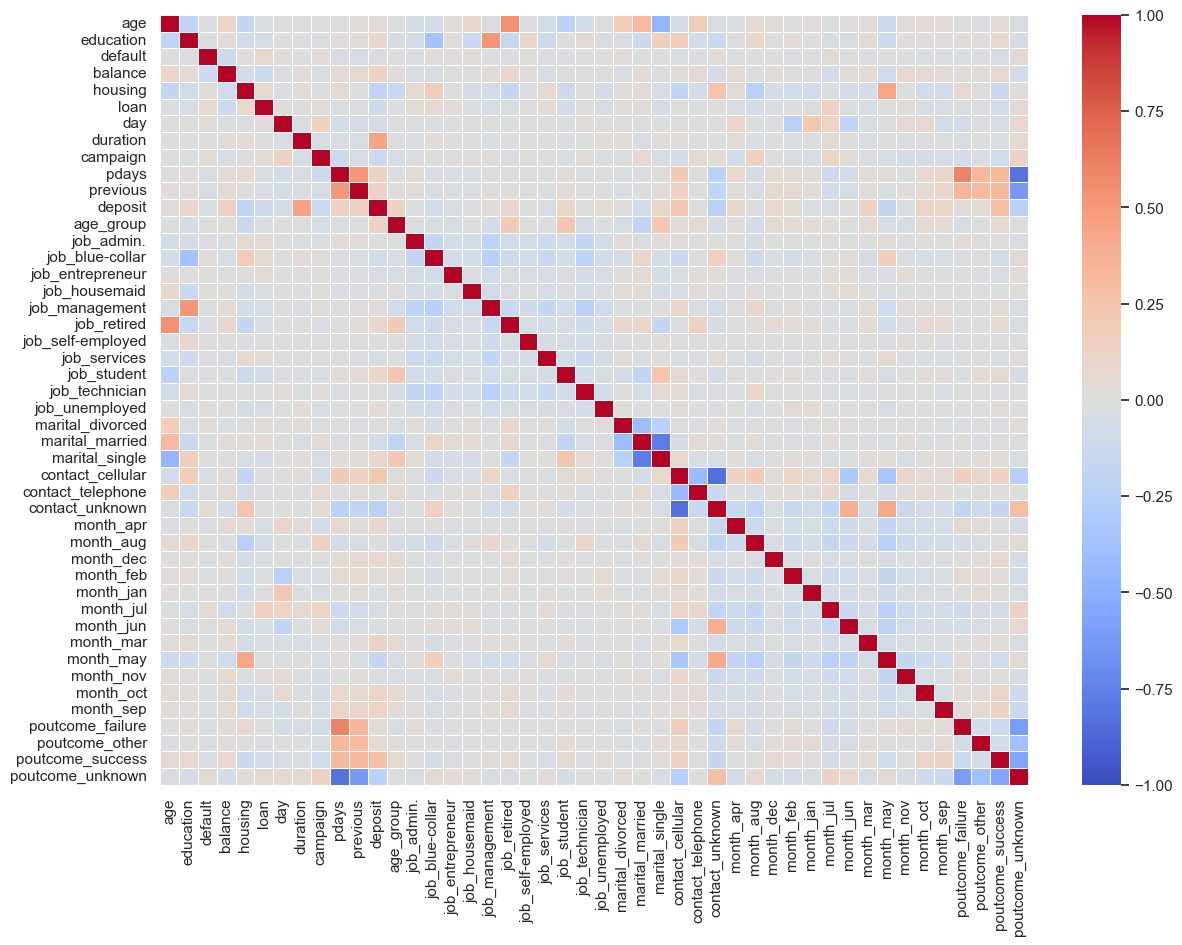

In [166]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(df_full.corr(), annot=False, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 14}, vmin=-1, vmax=1)

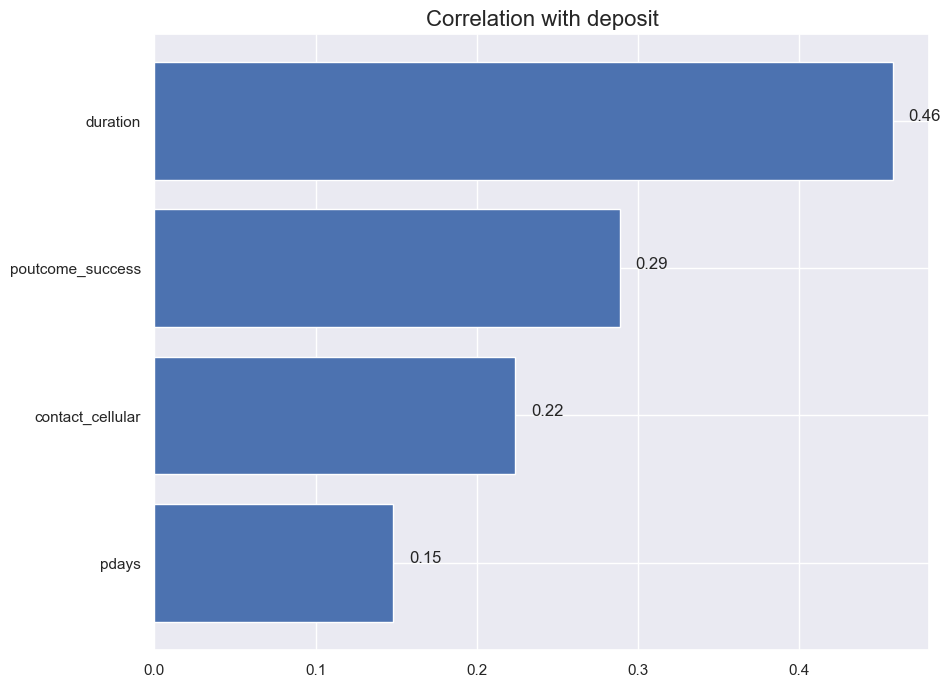

In [167]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr_values = df_full.corr()["deposit"].apply(lambda x: x).sort_values()[-5:-1]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(corr_values.index, corr_values.values)

for i, v in enumerate(corr_values.values):
    ax.text(v + 0.01, i, str(round(v, 2)), fontsize=12)

ax.set_title("Correlation with deposit", fontsize=16)
plt.show()

### Задания 7 и 8

In [168]:
object_columns = df.select_dtypes(include=[object]).columns.tolist()
df = df_full.drop(columns=object_columns)

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [169]:
# рассчитайте необходимые показатели
# Каким получился размер тестовой выборки?
# Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.
print(y_test.shape)
print(y_test.mean().round(2))

(3335,)
0.46


### Задание 9

In [175]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.feature_selection import chi2
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train, y_train)
 
columns_new = list(selector.get_feature_names_out())
X_train = X_train[columns_new]
X_test = X_test[columns_new]
columns_new

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 10

In [177]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

print(X_test_scaled[:, 0].mean().round(2)) 

0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [179]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [221]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)

dt.fit(X_train_scaled, y_train)

y_train_pred = dt.predict(X_train_scaled)
print(metrics.accuracy_score(y_train, y_train_pred).round(2))
y_test_pred = dt.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_test_pred).round(2))


0.82
0.81


### Задание 5

In [173]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [174]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [175]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [176]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [177]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [178]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna